# Srednjekvadratna aproksimacija

Tehnike srednjekvadratne aproksimacije ćemo demonstrirati kroz primere rešavanja preuslovljenih sistema. 

Za sistem jednačina $Ax = b$ kažemo da je `preuslovljen` ako je matrica $A$ dimenzije $m\times n$ i važi $m>n$ tj. ako je broj jednačina sistema veći od broja nepoznatih. Rešenje ovakvog sistema se dobija kao rešenje optimizacionog problema $min_{x} \|A\cdot x - b\|^2$ kojim se minimizuje srednjekvadratna greška.


Analitičko rešenje sistema jednačina ima oblik $x=(A^{T}A)^{-1}A^{T}b$. Matricu $(A^{T}A)^{-1}A^{T}$ koja figuriše u ovom izrazu zovemo `pseudoinverzom` matrice $A$.

Za ocenu rešenja $x_{solution}$ sistema koristimo sumu kvadrata reziduala (engl. residual square sum, RSS). Suma kvadrata reziduala je vrednost $||A\cdot x_{solution} - b||^2$ i predstavljaj najmanju vrednost koja se može dobiti minimizacijom srednjekvadratne greške.

In [1]:
import numpy as np
from numpy import linalg as LA

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

### Primeri

**1.** Rešiti sistem jednačina dat u matričnom obliku $$\begin{bmatrix}2&0\\-1&1\\0&2\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}2\\0\\-2\end{bmatrix}.$$

In [4]:
A = np.array([
    [2, 0], 
    [-1, 1],
    [0, 2]
])
b = np.array([2, 0, -2]).T

In [7]:
x = LA.inv(A.T.dot(A)).dot(A.T).dot(b)

In [8]:
x

array([ 0.66666667, -0.66666667])

In [9]:
A_pinv = LA.pinv(A)

In [10]:
A_pinv.shape

(2, 3)

In [11]:
x = A_pinv.dot(b)

In [12]:
x

array([ 0.66666667, -0.66666667])

In [13]:
LA.norm(b - A.dot(x))**2

2.6666666666666665

In [15]:
x, rss, _, _ = LA.lstsq(A, b, rcond=None)

In [16]:
x

array([ 0.66666667, -0.66666667])

In [17]:
rss

array([2.66666667])

**2.** Odrediti koeficijente $\beta_0$ i $\beta_1$ tako da funkcija $f(x) = \beta_0 + \beta_1 x$ u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5, 0.1)$ u ravni.

Neka su $(x_i, y_i)$, $1 \le i \le 4$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = y$, gde je $A = \begin{bmatrix}1&x_1\\1&x_2\\1&x_3\\1&x_4\end{bmatrix}$, $\beta = \begin{bmatrix}\beta_0\\ \beta_1\end{bmatrix}$ i $y = \begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}$. 


Zadatak će pored korišćenja funkcije `lstsq` biti rešen i eksplicitnim nalaženjem vrednosti koeficijenata. 

In [18]:
points = [(0, 1.2), (0.5, 2.05), (1, 2.9), (-0.5, 0.1)]
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])
n = len(points)

In [19]:
A = np.vstack((np.ones(n), x)).T

In [20]:
A

array([[ 1. ,  0. ],
       [ 1. ,  0.5],
       [ 1. ,  1. ],
       [ 1. , -0.5]])

In [23]:
beta, rss, _, _ = LA.lstsq(A, y.T, rcond=None)

In [24]:
beta

array([1.1 , 1.85])

In [25]:
rss

array([0.01875])

In [ ]:
# TODO: 

Do rešenja optimizacionog problema $min_{\beta} \|y - A\cdot \beta\|^2$ tj. problema $min_{\beta_0, \beta_1}\|y - (\beta_0+\beta_1x)\|$  se može doći i računanjem parcijalnih izvoda po $\beta_0$ i $\beta_1$ i njihovim izjedanačavanjem sa nulom.  

Time se dobijaju formule 

$$\beta_1 = \frac{\sum_{i=1}^{n}{(x_i-\overline{x})(y_i-\overline{y})}}{\sum_{i=1}^{n}{(x_i-\overline{x})^2}}$$ i
$$\beta_0 = \overline{y}-\beta_1\overline{x}$$ u kojima su $\overline{x}$ i $\overline{y}$ srednje vrednosti vektora $x$ i $y$.

In [26]:
beta_1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)

In [27]:
beta_1

1.8499999999999996

In [28]:
beta_0 = y.mean() - beta_1 * x.mean()

In [29]:
beta_0

1.1

**3.** Odrediti koeficijente $a$, $b$ i $c$ funkcije $f(x,y) = a + b x + c y$ tako da u smislu metode najmanjih kvadrata aproksimira skup tačaka $(3, 3, -1)$, $(5, 3, 1)$ i $(3, 4, 2)$ u prostoru.

Neka su $(x_i, y_i, z_i)$, $1 \le i \le 3$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = z$, gde je $A = \begin{bmatrix}1&x_1&y_1\\1&x_2&y_2\\1&x_3&y_3\end{bmatrix}$, $\beta = \begin{bmatrix}a\\ b\\ c\end{bmatrix}$ i $z = \begin{bmatrix}z_1\\z_2\\z_3\end{bmatrix}$.

**4.** Odrediti vrednosti koeficijenata $a$ i $b$ tako da funkcija $f(x) = a + b \sin x$ u smislu metode najmanjih kvadrata aproksimira skup tačaka $(2, 2.6)$, $(-1.22, -1.7)$, $(8.32, 2.5)$ i $(4.23, -1.6)$ u ravni. Dati ocenu greške. Prikazati skup tačaka i nacrtati rezultujuću funkciju.

Neka su $(x_i, y_i)$, $1 \le i \le 4$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = y$, gde je $A = \begin{bmatrix}1&\sin x_1\\1&\sin x_2\\1&\sin x_3\\1&\sin x_4\end{bmatrix}$, $\beta = \begin{bmatrix}a\\ b\end{bmatrix}$ i $y = \begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}$.

**5.** U datoteci *social_reach.csv* se nalaze cene reklamiranja za različite demografske grupe koje su date u hiljadama evra za 1000 pregleda. Svaka od tri kolone označava različitu platformu za reklamiranje (na primer, platforme mogu biti Facebook, Instagram ili YouTube). Svaki red označava različitu demografsku grupu, koja može npr. biti posebna država u kojoj se reklama plasira. Potrebno je odrediti iznos sredstava potreban da se ostvari približno milion pregleda za svaku demografsku grupu, gledajući po svim platformama ukupno.

In [31]:
data = pd.read_csv('data/social_reach.csv')

In [32]:
data

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62


Neka je $a_{ij}$, $0 \le i \le 9$, $0 \le j \le 2$ cena u hiljadama evra za 1000 pregleda za svaku od 10 demografskih grupa i svaku platformu za reklamiranje. Kako je potrebno odrediti ukupne cene za reklamiranje, potrebno je rešiti sledeći sistem jednačina:

$$\begin{bmatrix}a_{00}&a_{01}&a_{02}\\a_{10}&a_{11}&a_{12}\\ \vdots & \vdots & \vdots\\a_{90}&a_{91}&a_{92}\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \begin{bmatrix}1000\\1000\\\vdots\\1000\end{bmatrix}.$$

Elementi rezultujućeg vektora su 1000, jer su cene u matrici date za 1000 pregleda, a potrebno je ostvariti milion pregleda. Za svaku demografsku grupu $i$, potrebno je odrediti koeficijente $x_1,x_2,x_3$ tako da važi $a_{i0}x_1+a_{i1}x_2+a_{i2}x_3 \approx 1000$, pa se koeficijenti mogu približno odrediti metodom najmanjih kvadrata.

In [33]:
data.shape

(10, 3)

In [34]:
n = 10 

In [35]:
A = data[['web1', 'web2', 'web3']]
b = 1000 * np.ones(n).T

In [36]:
solution, rss, _, _ = LA.lstsq(A, b, rcond=None)

In [37]:
social_reach = A.dot(solution)

<BarContainer object of 10 artists>

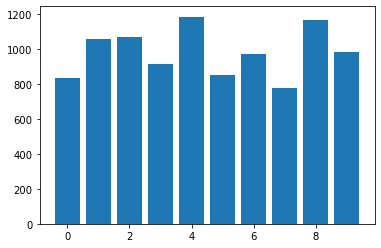

In [38]:
plt.bar(A.index, social_reach)

In [39]:
solution

array([  62.07662454,   99.98500403, 1442.83746254])

In [40]:
rss

array([175928.89516314])

**6.** U kompjuterskoj grafici i 3D modelovanju *algoritam bilinearne interpolacije* se koristi za aproksimiranje vrednosti boja i tekstura na osnovu poznatih vrednosti svojstava okolnih piksela. Zahvaljujući ovom algoritmu moguće su memorijske optimizacije i prikazi sadržaja sa različitim nivoima detalja. 

<img src='assets/level_of_details.jpeg' style='width: 400px'/>

Podsetimo se da linearnom interpolacijom za funkciju $f(x)$ jedne promenljive na osnovu vrednosti u tačkama $x_1$ i $x_2$ koje redom iznose $y_1$ i $y_2$ izračunavamo vrednost u novoj tački $x$. <img src='assets/linear_interpolation.png'/>

Algoritam bilinearne interpolacije za tačku $(x, y)$ određuje vrednost funkcije $Q(x, y)$ dveju promenljivih ukoliko su poznate vrednosti okolnih tačaka $(x_1, y_1)$, $(x_1, y_2)$, $(x_2, y_1)$ i $(x_2, y_2)$ i redom iznose $Q_{11}$, $Q_{12}$, $Q_{21}$ i $Q_{22}$ (pogledati sliku). Algoritmom se prvo linearnom interpolacijom određuju vrednosti tačaka $R_1$ i $R_2$, a potom se novom linearnom interpolacijom na osnovu njihovih vrednosti određuje finalna vrednost $P$ u tački $(x, y)$. <img src='assets/bilinear_interpolation.png' style='width: 300px'/>

Za interpolaciju duž x-ose mogu se koristiti formule $$Q(x, y_1) = \frac{x_2-x}{x_2-x_1}Q_{11} + \frac{x-x_1}{x_2-x_1}Q_{21}$$ i $$Q(x, y_2)= \frac{x_2-x}{x_2-x_1}Q_{12} + \frac{x-x_1}{x_2-x_1}Q_{22}$$, a za interpolaciju duž y-ose formula $$f(x, y) = \frac{y_2-y}{y_2-y_1} Q(x, y_1) + \frac{y-y_1}{y_2-y_1}Q(x, y_2)$$. 

Alternativni način računanja vrednosti bilinearne interpolacije za tačku $(x, y)$ svodi se na primenu funkcije oblika $Q(x, y) = a_0 + a_1\cdot x+a_2\cdot y+a_3\cdot x\cdot y$ čiji se koeficijenti mogu odrediti rešavanjem sistema jednačina za tačke $(x_1, y_1)$, $(x_1, y_2)$, $(x_2, y_1)$ i $(x_2, y_2)$ i poznate vrednosti funkcije $Q_{11}$, $Q_{12}$, $Q_{21}$ i $Q_{22}$ u njima. Implementirati i ovu funkciju. 

In [41]:
def bi_system(x1, x2, y1, y2, x, y, Q11, Q12, Q21, Q22):
    A = np.vstack([
        np.array([1, 1, 1, 1]), 
        np.array([x1, x1, x2, x2]), 
        np.array([y1, y2, y1, y2]), 
        np.array([x1*y1, x1*y2, x2*y1, x2*y2])
    ]).T
    
    b = np.array([Q11, Q12, Q21, Q22])
    
    coef, _, _, _ = LA.lstsq(A, b, rcond=None)
    
    solution = np.dot(coef,  np.array([1, x, y, x*y]))
    
    return solution

Sada ćemo učitati sliku `jazz.jpq` koja se nalazi u direktorijumu `data`, a potom izdvojiti vrednosti tačaka (300, 100), (300, 150), (340, 100) i (340, 150) i na osnovu njih izračunati vrednost piksela u tački (320, 110). Za rad sa sklikama iskoristićemo biblioteku `PIL` o kojoj će biti više reči na narednim časovima. U ovom primeru biće nam potrebna funkcija `open` za učitavanje slike i funkcija `convert` za prevođenje slike u crno-beli mod.

In [42]:
from PIL import Image

In [43]:
image = Image.open('data/jazz.jpg').convert('L')

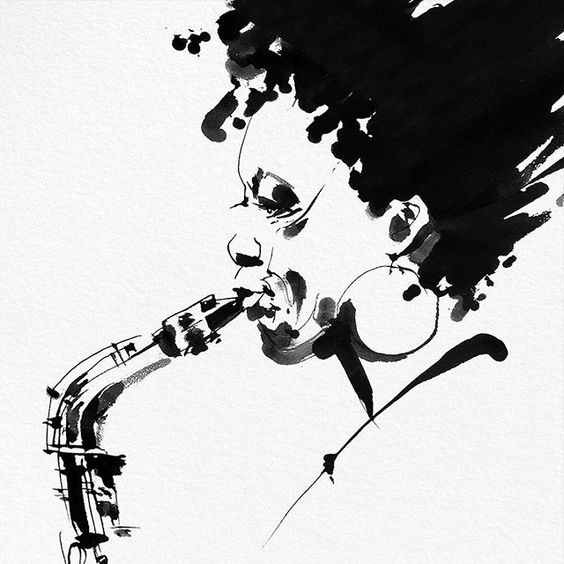

In [44]:
image

In [45]:
type(image)

PIL.Image.Image

In [46]:
image_as_array = np.array(image)

In [47]:
type(image_as_array)

numpy.ndarray

In [48]:
x1 = 300
x2 = 340 
y1 = 100
y2 = 150

In [49]:
Q11 = image_as_array[x1, y1]
Q12 = image_as_array[x1, y2]
Q21 = image_as_array[x2, y1]
Q22 = image_as_array[x2, y2]

In [50]:
x = 320
y = 110

In [51]:
bi_system(x1, x2, y1, y2, x, y, Q11, Q12, Q21, Q22)

244.90000000000572

In [52]:
image_as_array[x, y]

250